In [30]:
import matplotlib.pyplot as plt
%matplotlib inline

from agents import Agent

# Navigation

---

You are welcome to use this coding environment to train your agent for the project.  Follow the instructions below to get started!

## 1. Before you start

### 1a. When running on the dedicated Udacity workspace
Run the next code cell to install a few packages.  This line will take a few minutes to run!

In [1]:
!pip -q install ./python

tensorflow 1.7.1 has requirement numpy>=1.13.3, but you'll have numpy 1.12.1 which is incompatible.
ipython 6.5.0 has requirement prompt-toolkit<2.0.0,>=1.0.15, but you'll have prompt-toolkit 3.0.18 which is incompatible.


The environment is already saved in the Workspace and can be accessed at the file path provided below.  Please run the next code cell without making any changes.

### 1b. When running at another location of your own choice, follow the instructions in the README to setup your environment

## 2. Train the agent

In [20]:
from collections import deque
import torch

def dqn(n_episodes=3000, max_t=1000, eps_start=1.0, eps_end=0.01, eps_decay=0.995, checkpoints_file='checkpoint.pth'):
    """Deep Q-Learning.
    
    Params
    ======
        n_episodes (int): maximum number of training episodes
        max_t (int): maximum number of timesteps per episode
        eps_start (float): starting value of epsilon, for epsilon-greedy action selection
        eps_end (float): minimum value of epsilon
        eps_decay (float): multiplicative factor (per episode) for decreasing epsilon
        checkpoints_file (str): filename to save the model weights of the trained model
    """
    scores = []                        # list containing scores from each episode
    scores_window = deque(maxlen=100)  # last 100 scores
    eps = eps_start                    # initialize epsilon
    for i_episode in range(1, n_episodes+1):
        env_info = env.reset(train_mode=True)[brain_name] # reset the environment
        state = env_info.vector_observations[0]            # get the current state
        score = 0
        for t in range(max_t):
            action = agent.act(state, eps)
            env_info = env.step(action)[brain_name]        # send the action to the environment
            next_state = env_info.vector_observations[0]   # get the next state
            reward = env_info.rewards[0]                   # get the reward
            done = env_info.local_done[0] 
            agent.step(state, action, reward, next_state, done)
            state = next_state
            score += reward
            if done:
                break 
        scores_window.append(score)       # save most recent score
        scores.append(score)              # save most recent score
        eps = max(eps_end, eps_decay*eps) # decrease epsilon
        print('\rEpisode {}\tAverage Score: {:.2f}'.format(i_episode, np.mean(scores_window)), end="")
        if i_episode % 100 == 0:
            print('\rEpisode {}\tAverage Score: {:.2f}'.format(i_episode, np.mean(scores_window)))
        if np.mean(scores_window)>=15.0:
            print('\nEnvironment solved in {:d} episodes!\tAverage Score: {:.2f}'.format(i_episode-100, np.mean(scores_window)))
            torch.save(agent.qnetwork_local.state_dict(), checkpoints_file)
            break
    return scores



### 2a. Load the agent

In [5]:
from unityagents import UnityEnvironment
import numpy as np

# please do not modify the line below
env = UnityEnvironment(file_name="/data/Banana_Linux_NoVis/Banana.x86_64")

INFO:unityagents:
'Academy' started successfully!
Unity Academy name: Academy
        Number of Brains: 1
        Number of External Brains : 1
        Lesson number : 0
        Reset Parameters :
		
Unity brain name: BananaBrain
        Number of Visual Observations (per agent): 0
        Vector Observation space type: continuous
        Vector Observation space size (per agent): 37
        Number of stacked Vector Observation: 1
        Vector Action space type: discrete
        Vector Action space size (per agent): 4
        Vector Action descriptions: , , , 


In [6]:
brain_name = env.brain_names[0]
brain = env.brains[brain_name]

# number of actions
action_size = brain.vector_action_space_size

# dimension of state space 
state_size = brain.vector_observation_space_size

### 2b. Train using DQN

In [7]:
agent = Agent(state_size=state_size, action_size=action_size, seed=0)

In [8]:
scores = dqn()



Episode 100	Average Score: 0.55
Episode 200	Average Score: 3.82
Episode 300	Average Score: 7.74
Episode 400	Average Score: 10.01
Episode 500	Average Score: 12.59
Episode 600	Average Score: 13.88
Episode 700	Average Score: 13.91
Episode 800	Average Score: 13.63
Episode 900	Average Score: 14.42
Episode 922	Average Score: 15.04
Environment solved in 822 episodes!	Average Score: 15.04


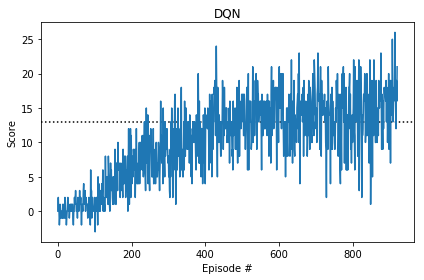

In [17]:
# plot the scores
fig = plt.figure()
ax = fig.add_subplot(111)
plt.axhline(13, linestyle=':', color='black')
plt.plot(np.arange(len(scores)), scores)
plt.ylabel('Score')
plt.xlabel('Episode #')
plt.title('DQN')
plt.tight_layout()
plt.savefig('Banana_scores_DQN.png')
plt.savefig('Banana_scores_DQN.pdf')
plt.show()

### 2c. Train using DDQN

In [27]:
agent = Agent(state_size=state_size, action_size=action_size, seed=0, algorithm='DDQN')

In [28]:
scores = dqn(checkpoints_file='checkpoint_DDQN.pth')

Episode 100	Average Score: 0.83
Episode 200	Average Score: 3.92
Episode 300	Average Score: 7.02
Episode 400	Average Score: 10.45
Episode 500	Average Score: 12.45
Episode 600	Average Score: 14.96
Episode 601	Average Score: 15.15
Environment solved in 501 episodes!	Average Score: 15.15


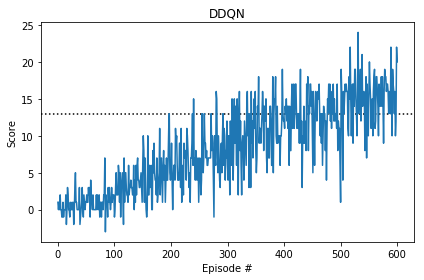

In [29]:
# plot the scores
fig = plt.figure()
ax = fig.add_subplot(111)
plt.axhline(13, linestyle=':', color='black')
plt.plot(np.arange(len(scores)), scores)
plt.ylabel('Score')
plt.xlabel('Episode #')
plt.title('DDQN')
plt.tight_layout()
plt.savefig('Banana_scores_DDQN.png')
plt.savefig('Banana_scores_DDQN.pdf')
plt.show()